In [1]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, LassoCV
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
entire_df = pd.read_csv('data.csv') # Load the file
entire_df.head() # check the first few rows, to see if the file was laoded correctly

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Split the data

In [3]:
train, test = train_test_split(entire_df, train_size=0.7, random_state=42)
train, validation = train_test_split(train, train_size=0.7, random_state=42)

In [4]:
print(train.shape, validation.shape, test.shape) # check if it is correct

(3341, 96) (1432, 96) (2046, 96)


## DEV TEAM

In [5]:
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0:1]
y_train = y_train.values.ravel() # flattens the df to 1-dim array


x_val = validation.iloc[:, 1:]
y_val = validation.iloc[:, 0:1]
y_val = validation.values.ravel() # flattens the df to 1-dim array
y_val = validation.iloc[:, 0].values.ravel()

df_x = x_val
df_y = y_val

## VALIDATION TEAM ONLY

### (ctrl + /) on the cells content to uncomment ;)

In [6]:
# train, test = train_test_split(entire_df, train_size=0.7, random_state=42)
# train, validation = train_test_split(train, train_size=0.7, random_state=42)

# x_train = train.iloc[:, 1:]
# y_train = train.iloc[:, 0].values.ravel()


# x_val = validation.iloc[:, 1:]
# y_val = validation.iloc[:, 0].values.ravel()

# df_x = x_val
# df_y = y_val

# x_test = test.iloc[:, 1:]
# y_test = test.iloc[:, 0].values.ravel()

# df_x = x_test
# df_y = y_test

## END OF VALIDATION TEAM ONLY

In [7]:
def filter_data(input_df, train_x_df): # Applies the same changes for multiple df
    threshold = 0.05 # Selecting the variance threshold - very low
    sel = VarianceThreshold(threshold=threshold)
    transformed_features = sel.fit_transform(train_x_df)
    selected_columns = sel.get_support(indices=True)
    selected_columns = input_df.columns[selected_columns]
    selected_df = input_df[selected_columns]
    selected_df # df with the low variance columns removed
    return selected_df

In [8]:
def calculate_metrics(actual, predictions):
    """
    as actual use the real data, as predictions use the predicted values
    
    Helper func. to calculate multiple scores
    """
    # Compute accuracy
    accuracy = accuracy_score(actual, predictions)

    # Compute precision
    precision = precision_score(actual, predictions)

    # Compute recall
    recall = recall_score(actual, predictions)

    # Compute F1-score
    f1 = f1_score(actual, predictions)
    # Print all the metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    cm = confusion_matrix(df_y, predictions)

    # Calculate percentages
    total = cm.sum()
    fp_percent = (cm[0, 1] / total) * 100
    fn_percent = (cm[1, 0] / total) * 100
    tp_percent = (cm[1, 1] / total) * 100
    tn_percent = (cm[0, 0] / total) * 100

    # Create matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap([[tn_percent, fp_percent], [fn_percent, tp_percent]], annot=True, fmt=".2f", cmap="YlGn", cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], annot_kws={"color": "black"})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f'fp percent:{fp_percent}, fn percent:{fn_percent}, tp percent:{tp_percent}, tn percent:{tn_percent}')


In [9]:
df_x = filter_data(df_x, x_train)
x_train = filter_data(x_train, x_train)

In [10]:
df_x

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,...,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Total assets to GNP price
4722,1.429267e-04,7.080000e+09,0.000528,0.061134,8.420000e+09,0.000465,0.004793,0.012065,0.001150,0.005494,...,0.019876,0.005638,0.005232,0.002191,0.008650,3.873630e-03,1.204615e-04,7.790000e+09,3.170000e+09,0.000561
3585,1.450000e+09,6.960000e+08,0.000232,0.024321,9.370000e+09,0.000799,0.004653,0.004820,0.001065,0.005931,...,0.011313,0.019625,0.005191,0.000853,0.004272,1.097312e-02,1.141037e-04,9.360000e+09,1.470000e+09,0.010091
1500,2.349734e-04,5.260000e+07,0.000700,0.026468,8.990000e+09,0.000526,0.023506,0.001889,0.000856,0.007381,...,0.014952,0.010885,0.023789,0.005788,0.010983,2.280150e-03,1.734547e-04,1.579399e-04,3.620000e+09,0.000494
1355,7.460000e+08,7.860000e+09,0.000816,0.071661,7.120000e+09,0.000463,0.010678,0.004281,0.005470,0.001156,...,0.055447,0.014629,0.010648,0.025912,0.011397,4.971634e-03,9.440000e+09,7.170000e+09,1.741969e-04,0.048454
3419,2.500000e+09,7.130000e+08,0.000245,0.042168,1.022388e-04,0.000531,0.004311,0.009002,0.001159,0.005458,...,0.015690,0.036008,0.004168,0.002542,0.001808,5.106114e-02,7.450000e+09,7.100000e+09,4.230000e+09,0.020226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,1.418860e-04,0.000000e+00,0.000572,0.008228,6.510000e+09,0.000445,0.003986,0.003536,0.000881,0.007178,...,0.007506,0.007471,0.005710,0.002661,0.014832,0.000000e+00,2.487923e-04,1.299516e-04,5.650000e+09,0.000647
6117,1.280000e+09,5.090000e+07,0.000159,0.024411,3.530000e+09,0.000343,0.012134,0.002456,0.000607,0.010429,...,0.389225,0.013702,0.012275,0.022826,0.001707,0.000000e+00,1.999454e-04,2.040923e-04,3.502238e-04,0.012088
5486,1.624693e-04,3.840000e+09,0.000246,0.035437,6.460000e+09,0.000469,0.013376,0.004090,0.000672,0.009410,...,0.025686,0.008716,0.013883,0.006782,0.004051,8.136351e-04,1.660490e-04,1.609088e-04,7.350000e+07,0.000962
3913,6.480000e+09,3.750000e+09,0.000405,0.027603,6.970000e+09,0.000461,0.013205,0.001943,0.001309,0.004833,...,0.011486,0.011527,0.013924,0.026226,0.003124,0.000000e+00,1.554386e-04,1.547373e-04,2.732725e-04,0.074203


### From now on, we'll use x_train to train the data and df_x will be used for predictions

### Logistic Regression

In [11]:
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [12]:
pred = lr_model.predict(df_x)

In [13]:
df_x

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,...,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Total assets to GNP price
4722,1.429267e-04,7.080000e+09,0.000528,0.061134,8.420000e+09,0.000465,0.004793,0.012065,0.001150,0.005494,...,0.019876,0.005638,0.005232,0.002191,0.008650,3.873630e-03,1.204615e-04,7.790000e+09,3.170000e+09,0.000561
3585,1.450000e+09,6.960000e+08,0.000232,0.024321,9.370000e+09,0.000799,0.004653,0.004820,0.001065,0.005931,...,0.011313,0.019625,0.005191,0.000853,0.004272,1.097312e-02,1.141037e-04,9.360000e+09,1.470000e+09,0.010091
1500,2.349734e-04,5.260000e+07,0.000700,0.026468,8.990000e+09,0.000526,0.023506,0.001889,0.000856,0.007381,...,0.014952,0.010885,0.023789,0.005788,0.010983,2.280150e-03,1.734547e-04,1.579399e-04,3.620000e+09,0.000494
1355,7.460000e+08,7.860000e+09,0.000816,0.071661,7.120000e+09,0.000463,0.010678,0.004281,0.005470,0.001156,...,0.055447,0.014629,0.010648,0.025912,0.011397,4.971634e-03,9.440000e+09,7.170000e+09,1.741969e-04,0.048454
3419,2.500000e+09,7.130000e+08,0.000245,0.042168,1.022388e-04,0.000531,0.004311,0.009002,0.001159,0.005458,...,0.015690,0.036008,0.004168,0.002542,0.001808,5.106114e-02,7.450000e+09,7.100000e+09,4.230000e+09,0.020226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,1.418860e-04,0.000000e+00,0.000572,0.008228,6.510000e+09,0.000445,0.003986,0.003536,0.000881,0.007178,...,0.007506,0.007471,0.005710,0.002661,0.014832,0.000000e+00,2.487923e-04,1.299516e-04,5.650000e+09,0.000647
6117,1.280000e+09,5.090000e+07,0.000159,0.024411,3.530000e+09,0.000343,0.012134,0.002456,0.000607,0.010429,...,0.389225,0.013702,0.012275,0.022826,0.001707,0.000000e+00,1.999454e-04,2.040923e-04,3.502238e-04,0.012088
5486,1.624693e-04,3.840000e+09,0.000246,0.035437,6.460000e+09,0.000469,0.013376,0.004090,0.000672,0.009410,...,0.025686,0.008716,0.013883,0.006782,0.004051,8.136351e-04,1.660490e-04,1.609088e-04,7.350000e+07,0.000962
3913,6.480000e+09,3.750000e+09,0.000405,0.027603,6.970000e+09,0.000461,0.013205,0.001943,0.001309,0.004833,...,0.011486,0.011527,0.013924,0.026226,0.003124,0.000000e+00,1.554386e-04,1.547373e-04,2.732725e-04,0.074203


Accuracy: 0.9650837988826816
Precision: 0.0
Recall: 0.0
F1-score: 0.0


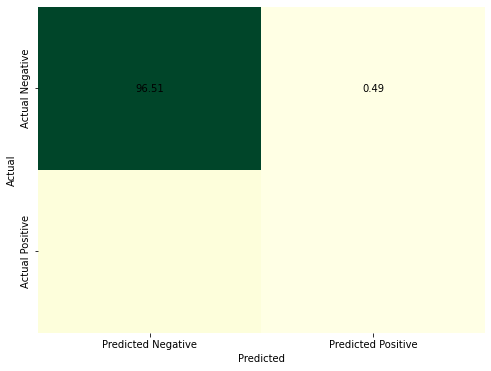

fp percent:0.4888268156424581, fn percent:3.0027932960893855, tp percent:0.0, tn percent:96.50837988826815


In [14]:
calculate_metrics(df_y, pred)

# Podejrzanie dobry wynik - zobaczmy co się stanie jak dodamy wagę

In [15]:
lr2_model = LogisticRegression(max_iter=10000, class_weight='balanced')
lr2_model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [16]:
pred = lr2_model.predict(df_x)

Accuracy: 0.7506983240223464
Precision: 0.05142857142857143
Recall: 0.4186046511627907
F1-score: 0.0916030534351145


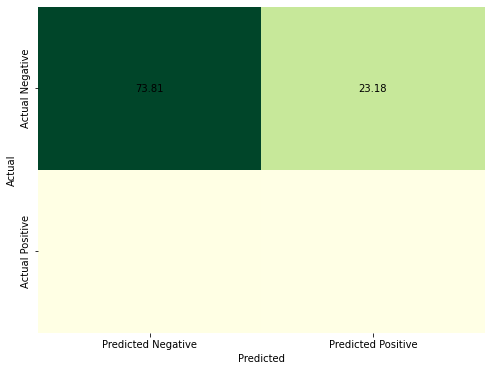

fp percent:23.18435754189944, fn percent:1.7458100558659218, tp percent:1.2569832402234637, tn percent:73.81284916201118


In [17]:
calculate_metrics(df_y, pred)

# DecisionTREE

In [18]:
DT_model = DecisionTreeClassifier() # Create a decision tree classifier object

DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
pred = DT_model.predict(df_x)

Accuracy: 0.960195530726257
Precision: 0.3333333333333333
Recall: 0.32558139534883723
F1-score: 0.3294117647058823


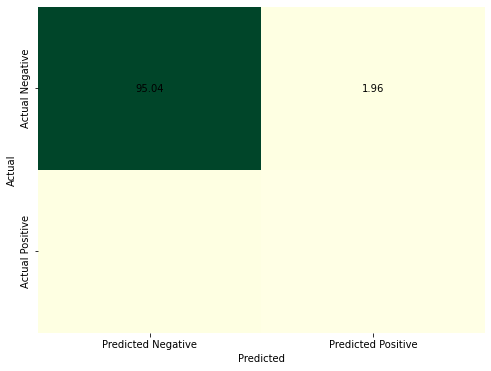

fp percent:1.9553072625698324, fn percent:2.025139664804469, tp percent:0.9776536312849162, tn percent:95.04189944134079


In [20]:
calculate_metrics(df_y, pred)

# Random Forest

In [21]:
RF_model = RandomForestClassifier()

RF_model.fit(x_train, y_train)

predictions = RF_model.predict(df_x)



Accuracy: 0.9692737430167597
Precision: 0.4444444444444444
Recall: 0.09302325581395349
F1-score: 0.15384615384615385


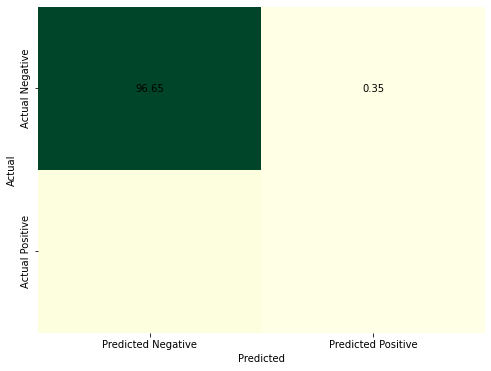

fp percent:0.34916201117318435, fn percent:2.7234636871508378, tp percent:0.27932960893854747, tn percent:96.64804469273743


In [22]:
calculate_metrics(df_y, predictions)